<header style="padding:1px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>Customer Sentiment Analysis using Vantage Advanced SQL Functions</b>
</header>


<p style = 'font-size:20px;font-family:Arial;color:#E37C4D'><b>Introduction</b></p>
    

<br>

<p style = 'font-size:16px;font-family:Arial'>Sentiment Analysis is defined as the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.</p>

<p style = 'font-size:16px;font-family:Arial'>Many sentiment analysis tools exist, but most of them cannot perform flexibly enough and at a scale that allows the ability to deploy these insights to <b>all</b> types of use cases including real-time, high concurrency, or extreme volume</p> 

<p style = 'font-size:16px;font-family:Arial'>Teradata Vantage native Natural Langyage Analysis functions, combined with whole-data set statistical analysis; can provide deep insights into natural language intent, patterns, and author sentiment at extreme scale, speed, and concurrency.</p> 
<hr>

<p style = 'font-size:16px;font-family:Arial'>The following demonstration will illustrate how simple it is to utilize these native functions to understand customer sentiment, and measure the accuracy of machine-generated predictions.</p>

<p style = 'font-size:16px;font-family:Arial'>Additionally, since Vantage supports client tools and applications ranging from the most modern programmatic APIs such as Python, REST, and R; to traditional dashboards, BI tools, and analytics via SQL, a virtually unlimited number and types of users and applications can consume the results of this deep analysis; effectively democratizing specialized analytics to the widest possible audience.</p>

<p style = 'font-size:16px;font-family:Arial'>The data for this demonstration consists of Amazon Fine Foods Reviews, which can be found <a href = 'https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews'>here</a>.  The Demonstration below consists of three steps:</p>

<ol style = 'font-size:16px;font-family:Arial'>
    <li>Analyze the raw data set, including customer rating values</li>
    <li>Execute native Sentiment Analysis function and inspect the output</li>
    <li>Analyze the results and compare to the author rating</li>
    </ol>
    
<img src = 'images/Flow_Diagram_Sentiment.png' width = 100%>

<hr>

<p style = 'font-size:16px;font-family:Arial'>Here, we will inspect the original data set, and perform some analysis on customer-provided ratings values.</p>

<p style = 'font-size:16px;font-family:Arial'>

<ol style = 'font-size:16px;font-family:Arial'>
    <li>Inspect the rows of the table</li>
    <li>Analyze the distribution of ratings</li>
    <li>Visualize the results</li>
    </ol>
    </p>

<p style = 'font-size:20px;font-family:Arial;color:#E37C4D'> <b>1. Start by connecting to the Teradata system </b></p>
<p style = 'font-size:16px;font-family:Arial'>You will be prompted to provide the password. Enter your password, press Enter, then use down arrow to go to next cell.</p>

In [1]:
%connect local,  hidewarnings=true

Password: ········


Success: 'local' connection established and activated for user 'demo_user', with default database 'demo_user'


<p style = 'font-size:16px;font-family:Arial'>Setup for execution of notebook. Begin running steps with Shift + Enter keys.</p>


In [2]:
Set query_band='DEMO=SentimentAnalysis-AmazonReviews.ipynb;' update for session;

Success: 1 rows affected

<b style = 'font-size:20px;font-family:Arial;color:#E37C4D'>2. Getting Data for This Demo
<p style = 'font-size:16px;font-family:Arial'>We have provided data for this demo on cloud storage.  You have the option of either running the demo using foreign tables to access the data without using any storage on your environment or downloading the data to local storage which may yield somewhat faster execution, but there could be considerations of available storage.  There are two statements in the following cell, and one is commented out.  You may switch which mode you choose by changing the comment string.
Here we are only creating local databases and tables as there are 755 columns in table which will be faster in local tables.</p>    


In [4]:
call get_data('DEMO_FoodReviews_cloud'); ---takes about 35 seconds
---call get_data('DEMO_FoodReviews_local'); ---takes about 35 seconds

Success: 0 rows affected

Success: 0 rows affected

,Message
1,That ran for 0:00:12.68 with 4 statements and 0 errors.


<p style = 'font-size:16px;font-family:Arial'>Optional step – if you want to see status of databases/tables created and space used.</p>


In [5]:
call space_report();  -- optional, takes about 10 seconds

Success: 0 rows affected

Success: 0 rows affected

,Space_Report
1,"You have: #databases=1 #tables=18 #views=28 You have used 17.4 MB of 30,851.3 MB available - 0.1% ... Space Usage OK"
2,
3,Database Name #tables #views Avail MB Used MB
4,"demo_user 18 27 30,851.3 MB 17.4 MB"
5,DEMO_FoodReviews 0 1 0.0 MB 0.0 MB


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Inspect the Data</p>

<p style = 'font-size:16px;font-family:Arial'>Simple SQL queries to show the data - counts, ranges, content.</p>

In [6]:
select count(*), min(Score) as MinValue, max(Score) as MaxValue from "DEMO_FoodReviews"."FINE_FOOD_REVIEWS";
select * from "DEMO_FoodReviews"."FINE_FOOD_REVIEWS" sample 5;

,Count(*),MinValue,MaxValue
1,568454,1,5


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,ReviewTime,ReviewSummary,ReviewText
1,481295,B0014CRQWS,A1RTX8TMMP3RB9,Clairene M. Guerra,0,0,5,2011-12-14,Well Received,"I purchased this, along with the gatorade bottle, for my brother as a gift and he loved it and used every last bit of powder. Loved the flavor, mixability. Great product.For me, personally, I wish they had powders in the reduced sugar/calorie."
2,145383,B0012BSMJM,A1OTXOGDLHTYSR,M. Whitehead,2,2,5,2010-10-12,Stash Green Tea Powder,This is a quick and convenient way to drink green tea! I add lemon juice and stevia.
3,403836,B000LKZ3I8,A268FJIKIXBKV6,Jennifer Lin,0,0,4,2009-05-14,Solution for anti-milk toddler,"After nursing for about 15 months, my toddler wouldn't drink cow milk, soy milk, chocolate milk, etc... but somehow found the Horizon strawberry milk box fascinating and yummy. A good source of calcium and protein of course, plus very convenient. For kids who like to chew on their straws this one doesn't last very long and often sinks down all the way into the box. I usually toss the straw that comes with the box and use a taller, bendy straw instead."
4,430912,B001IZHX8I,A1YWCDXH7PCM4,"K. Tutor ""techno geek""",1,1,5,2009-06-08,Good to the last nut,Old time favorite. It has never changed. I wish I could say the same for my waist size.
5,69745,B003CK7O36,A1SCQ87CZEJKTJ,"S. Baksa ""Mamma Bear""",4,6,5,2006-04-05,Remarkable,"A friend of mine brought this tea to work one day to share.I am prepared to drop coffee altogether. It has captured my sences and ""Bravo"" to the genious behind it."


<p style = 'font-size:16px;font-family:Arial'>We have 500K reviews, rating from 1 to 5.</p>

<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Analyze the distribution of author ratings</p>

<p style = 'font-size:16px;font-family:Arial'>Create a simple aggregation query to calculate distribution</p>

In [7]:
SELECT Score, count(Score) as CountOfValues
FROM "DEMO_FoodReviews"."FINE_FOOD_REVIEWS"
GROUP BY 1 
ORDER BY 1

,Score,CountOfValues
1,1,52268
2,2,29769
3,3,42640
4,4,80655
5,5,363122


<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Visualize the results</p>

<p style = 'font-size:16px;font-family:Arial'>Chart the results with a simple bar plot</p>

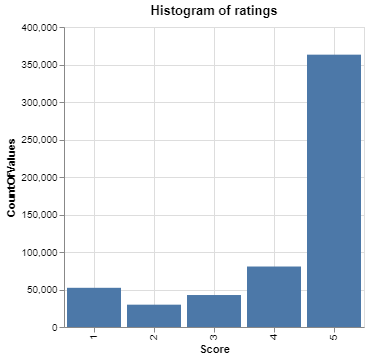

In [8]:
%chart x=Score, y=CountOfValues, title=Histogram of ratings, height=300, width=300

<hr>

<p style = 'font-size:20px;font-family:Arial;color:#E37C4D'><b>Step 2- Use Sentiment Extractor to calculate the sentiment score</b></p>

<p style = 'font-size:16px;font-family:Arial'>Steps are as follow:</p>
<ol style = 'font-size:16px;font-family:Arial'>
    <li>Call the TD_SentimentExtractor function on reviews data</li>
    <li>Inspect the Results</li>
    <li>Create a new table that can be used for analysis later</li>
    </ol>

<p style = 'font-size:16px;font-family:Arial'>The TD_SentimentExtractor function uses a dictionary model to extract the sentiment (positive, negative, or neutral) of each input document or sentence.</p>

<p style = 'font-size:16px;font-family:Arial'>The function handles negated sentiments as follows:</p>

<ul style = 'font-size:16px;font-family:Arial'>
    <li>-1 if the sentiment is negated (for example, "I am not happy")</li>
    <li>-1 if the sentiment and a negation word are separated by one word (for example, "I am not very happy")</li>
    <li>+1 if the sentiment and a negation word are separated by two or more words (for example, "I am not saying I am happy")</li>
    </ul>
<hr>   
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>2.1 TD_SentimentExtractor Syntax</p>

<p style = 'font-size:16px;font-family:Arial'>TD_SentimentExtractor Syntax follows the Teradata SQL_MR conventions that take an InputTable and optional Dimension Table in the ON clause, followed by function parameters.  See the <a href = 'https://docs.teradata.com/search/all?query=TD_SentimentExtractor&content-lang=en-US'>documentation</a> for more details.</p>

In [9]:
SELECT TOP 5 * FROM TD_SentimentExtractor (
    ON "DEMO_FoodReviews"."FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
        TextColumn ('ReviewText')
        AnalysisType ('DOCUMENT')
        Accumulate('ReviewText')
) as dt;

,ReviewText,polarity,sentiment_score,sentiment_words
1,"i was expecting something like a bunch of bully sticks but these are gone in literally 4 bites! even with my 14 week old aussie! it seems like a bargain but it's seriously not much at all when the dogs devour a stick in like a min. they smell like they where dipped in motor oil or something awful. it get a bit better when you rinse them but still stinky and i feel reluctant to feed them to my dogs. my cattle dog mix turns his head when i try t give him these! awful treats, don't recommend to anyone!!! (i bought the beef basted)",NEU,0,"In total, positive score:6 negative score:-6. awful -1 (2), don't recommend -1 (1), better 1 (1), reluctant -1 (1), bully -1 (1), bargain 1 (1), smell -1 (1), like 1 (4)."
2,"My 2 1/2 year old son is a very picky eater and this is one of the few foods I feel really good that I can get him to eat. So tasty - they pass his test! I love them too, would live on them if I could pick one food to eat for the rest of my life!",POS,2,"In total, positive score:2 negative score:-1. good 1 (1), love 1 (1), picky -1 (1)."
3,"I started eating Quaker's Oatmeal To Go about 7 or 8 years ago - my favorite being banana. But, they have all disappeared from the grocery stores. We travel in our RV across the country, and I always look for Oatmeal To Go. Not finding any, I now purchase Oatmeal To Go from Amazon.Quaker Oatmeal To Go Variety Pack - 24 Count please note: Does not contain Bananna / Contains Apple Unfortunately, my first choice, banana, is evidently not being made anymore but I am happy with my present choices.Thank goodness for Amazon.",POS,2,"In total, positive score:4 negative score:-1. Unfortunately -1 (1), happy 1 (1), favorite 1 (1), Variety 1 (1), goodness 1 (1)."
4,"I bought these for my wife becuase she loves these pops, and although I don't have the sweet tooth she does, I have to agree that these are tastier than most I've tried. We were buying them from a local candy store, but they were expensive and they didn't always carry them in stock, so I bought this pack for her birthday, saving money and ending up with a nice reserve. She likes all the flavors, which is unusual because usually there is one or two flavors in a box of candies that she doesn't. Anyway, these are more expensive than most pops, but her happiness is worth it.",POS,2,"In total, positive score:6 negative score:-3. unusual -1 (1), likes 1 (1), happiness 1 (1), nice 1 (1), worth 1 (1), expensive -1 (2), sweet 1 (1), loves 1 (1)."
5,"I consider myself a chocolate connoisseur, with dark chocolates being my ultimate pleasure. My boyfriend, however, is a very picky chocolate eater. For Christmas I had to get him his favorite chocolate, unfortunately they don't sell it locally. Honestly, after trying Milka, I have a new favorite milk chocolate. Smooth, creamy, and melt-in-your-mouth irresistible, Milka is definitely worth buying online, even worth coercing some of the local vendors into keeping it in stock regularly!",POS,2,"In total, positive score:7 negative score:-3. unfortunately -1 (1), dark -1 (1), Smooth 1 (1), favorite 1 (2), worth 1 (2), irresistible 1 (1), picky -1 (1), pleasure 1 (1)."


<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>2.2 TD_SentimentExtractor Output</p>

<p style = 'font-size:16px;font-family:Arial'>The function outputs three new columns (in addition to the columns declared in the Accumulate parameter.</p>

<ul style = 'font-size:16px;font-family:Arial'>
    <li><b>content</b>  The column contains the sentence extracted from the document. The column displays if you use Sentence as the AnalysisType.</li>
    <li><b>polarity</b>  The sentiment value of the result. Possible values are POS (positive), NEG (negative), or NEU (neutral)Possible values are POS (positive), NEG (negative), or NEU (neutral)</li>
    <li><b>sentiment_score</b>  The sentiment score of polarity. Possible values are 0 (neutral), 1 (higher than neutral), or 2 (higher than 1)</li>
    <li><b>sentiment_words</b>  The string that contains a total positive score, total negative score, and sentiment words with their polarity_strength and frequency enclosed in parenthesis.</li>
    </ul>
    
<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>2.3 Create a permanent table with results</p>
<p style = 'font-size:16px;font-family:Arial'><b>(Table and view creation isn't currently working as of 01-SEP-22 - the rest of the demo uses subselects)</b>Note we accumulate the original id, review and rating columns, so we can compare the calculated values to the ratings provided by the author.</p>

In [11]:

CREATE VIEW SentimentExtractor_output_V as(
    SELECT TOP 5 * FROM TD_SentimentExtractor (
        ON "DEMO_FoodReviews"."FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    ) AS dt 
);


Success: 0 rows affected

In [12]:
SELECT TOP 5 * FROM SentimentExtractor_output_V


,Id,ReviewText,Score,polarity,sentiment_score,sentiment_words
1,323620,"My golden retriever, Whisper, is very prone to anxiety when I leave the house. I just fill this cube with Cheerios, or even her regular serving of her dog food, and she goes to town rolling it on the floor to get every bit of treats from the cube. We both love it!Word of caution: You need to have the cube in a room where there are no places for the cube to roll into and get stuck, like under couches or chairs. I have blocked off high bottomed chairs and couches so the cube does not get rolled into and stuck. My dog rolls this all around the room. I should spray her with Endust and have her clean up her hair while she is playing. KIDDING!",5,POS,1,"In total, positive score:4 negative score:-3. stuck -1 (2), clean 1 (1), love 1 (1), golden 1 (1), anxiety -1 (1), like 1 (1)."
2,298334,"MIO ""Fruit Punch"" has good sweetness and good flavor, being one of the better tasting ones of this brand. This one makes an excellent ""mixer"" as well!MIO is intended to be added to water and can be mixed ""to taste"", I like four short squirts into a 12oz water bottle. The snap lock lid is secure enough to carry the container in a shirt pocket and does not need to be refrigerated after opening.Recommended!CFH",4,POS,2,"In total, positive score:8 negative score:-1. secure 1 (1), good 1 (2), better 1 (1), enough 1 (1), Punch -1 (1), sweetness 1 (1), excellent 1 (1), like 1 (1)."
3,149167,This particular product was unpleasant at best. The consistancy was awful..... It reminded me of taking a curling iron to my barbie dolls hair as a young child.... plasticy/rubbery..... No thanks,1,NEU,0,"In total, positive score:1 negative score:-1. unpleasant -1 (1), best 1 (1)."
4,498073,"i was expecting something like a bunch of bully sticks but these are gone in literally 4 bites! even with my 14 week old aussie! it seems like a bargain but it's seriously not much at all when the dogs devour a stick in like a min. they smell like they where dipped in motor oil or something awful. it get a bit better when you rinse them but still stinky and i feel reluctant to feed them to my dogs. my cattle dog mix turns his head when i try t give him these! awful treats, don't recommend to anyone!!! (i bought the beef basted)",1,NEU,0,"In total, positive score:6 negative score:-6. awful -1 (2), don't recommend -1 (1), better 1 (1), reluctant -1 (1), bully -1 (1), bargain 1 (1), smell -1 (1), like 1 (4)."
5,492506,"I bought these for my wife becuase she loves these pops, and although I don't have the sweet tooth she does, I have to agree that these are tastier than most I've tried. We were buying them from a local candy store, but they were expensive and they didn't always carry them in stock, so I bought this pack for her birthday, saving money and ending up with a nice reserve. She likes all the flavors, which is unusual because usually there is one or two flavors in a box of candies that she doesn't. Anyway, these are more expensive than most pops, but her happiness is worth it.",5,POS,2,"In total, positive score:6 negative score:-3. unusual -1 (1), likes 1 (1), happiness 1 (1), nice 1 (1), worth 1 (1), expensive -1 (2), sweet 1 (1), loves 1 (1)."


<hr>
<p style = 'font-size:20px;font-family:Arial;color:#E37C4D'><b>Step 3 - Analyze the results and compare to author rating</b></p>

<p style = 'font-size:16px;font-family:Arial'>Additional analytic and data processing functions can be used to provide deeper insights into model accuracy, or inform better tuning of the analytic process.  What follows are some examples:</p>

<ol style = 'font-size:16px;font-family:Arial'>
    <li>Create a sentiment polarity out of the author ratings</li>
    <li>Use Vantage Functions to analyze the classification accuracy of our model</li>
    <li>Create a ratings value out of sentiment score and polarity</li>
    <li>Calculate the distributions of ratings values and visualize results</li>
 </ol>

<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>3.1 Create a categorical representation of author ratings.</p>
<p style = 'font-size:16px;font-family:Arial'>For purposes of comparison, assume the ratings values can be categorized into Negative, Neutral, and Positive categories to match the output of the Sentiment Analysis function.</p>

In [13]:
/*
Assume that a rating of 1 or 2 is Negative, 3 is Neutral, and 4 or 5 is Positive
*/
SELECT TOP 5 id, Score, polarity, sentiment_score,
    CASE  
        WHEN Score<3 THEN 'NEG'
        WHEN Score=3 THEN 'NEU'
        WHEN Score>3 THEN 'POS'
    END AS rating_polarity
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "DEMO_FoodReviews"."FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se

,Id,Score,polarity,sentiment_score,rating_polarity
1,432071,5,POS,2,POS
2,492506,5,POS,2,POS
3,467220,4,POS,2,POS
4,498073,1,NEU,0,NEG
5,323620,5,POS,1,POS


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>3.2 Using TD_ClassificationEvaluator</p>

<p style = 'font-size:16px;font-family:Arial'>In classification problems, a confusion matrix is used to visualize the performance of a classifier. The confusion matrix contains predicted labels represented across the row-axis and actual labels represented across the column-axis. Each cell in the confusion matrix corresponds to the count of occurrences of labels in the test data.  See the <a href = 'https://docs.teradata.com/search/all?query=TD_ClassificationEvaluator&content-lang=en-US'>documentation</a> for more details.</p>

<p style = 'font-size:16px;font-family:Arial'>This function takes an input table (in this case, the query we developed above), an optional output table with additional metrics, and function parameters including the columns that ate to be compared.</p>

In [201]:
DROP TABLE additional_metrics_labels

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3807:Object 'additional_metrics_labels' does not exist.

In [14]:
SELECT * FROM TD_ClassificationEvaluator(
ON (SELECT id, Score, polarity, sentiment_score,
    CASE  
        WHEN Score<3 THEN 'NEG'
        WHEN Score=3 THEN 'NEU'
        WHEN Score>3 THEN 'POS'
    END AS rating_polarity
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "DEMO_FoodReviews"."FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se) AS InputTable
OUT VOLATILE TABLE OutputTable(additional_metrics_labels)
USING
ObservationColumn('rating_polarity')
PredictionColumn('polarity')
NumLabels(3)
) AS du;

Success: 0 rows affected

,SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,CLASS_3,Precision,Recall,F1,Support
1,0,NEG,CLASS_1,35322,7987,24317,0.5223139029367403,0.43056181966673573,0.47202047266191377,82037
2,1,NEU,CLASS_2,15455,6313,33819,0.11356971953874108,0.14805347091932458,0.12853899640628344,42640
3,2,POS,CLASS_3,31260,28340,385641,0.8661399107449673,0.8689972666451844,0.8675662360042202,443777


<p style = 'font-size:16px;font-family:Arial'>We can see in the above output, these assumptions seem to indicate better predictive capabilities at  positive sentiment and possible correlation to higher ratings.</p>

<p style = 'font-size:16px;font-family:Arial'>Additional metrics table can be queried from the OutputTable</p>

In [17]:
select * from additional_metrics_labels order by 1,2,3;

,SeqNum,Metric,MetricValue
1,1,Accuracy                                          ,0.751645691647873
2,2,Micro-Precision                                   ,0.751645691647873
3,3,Micro-Recall                                      ,0.751645691647873
4,4,Micro-F1                                          ,0.751645691647873
5,5,Macro-Precision                                   ,0.5006745110734828
6,6,Macro-Recall                                      ,0.48253751907708153
7,7,Macro-F1                                          ,0.48937523502413915
8,8,Weighted-Precision                                ,0.7600696796346277
9,9,Weighted-Recall                                   ,0.751645691647873
10,10,Weighted-F1                                       ,0.755047880457828


<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>3.3 Create a Numeric value of sentiment polarity and strength to compare with author rating value</p>

<p style = 'font-size:16px;font-family:Arial'>For another method of comparison, let's assume the calculated sentiment polarity and score can be combined to create a ratings value.  Positive and Negative polarity can score 1 or 2 in 'strength', and Neutral has a 0 strength value.</p>


In [15]:
SELECT TOP 5 id, polarity, sentiment_score,
    CASE polarity 
        WHEN 'POS' THEN sentiment_score+3
        WHEN 'NEG' THEN ABS(sentiment_score-3)
        WHEN 'NEU' THEN 3
    END AS calculated_rating,
    Score as author_rating
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "DEMO_FoodReviews"."FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se

,Id,polarity,sentiment_score,calculated_rating,author_rating
1,492506,POS,2,5,5
2,432071,POS,2,5,5
3,406785,POS,2,5,5
4,149167,NEU,0,3,1
5,298334,POS,2,5,4


In [205]:
/*
DROP TABLE ratings_comparison
*/

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3807:Object 'ratings_comparison' does not exist.

In [17]:

CREATE TABLE ratings_comparison AS (
    SELECT id, polarity, sentiment_score,
    CASE polarity 
        WHEN 'POS' THEN sentiment_score+3
        WHEN 'NEG' THEN ABS(sentiment_score-3)
        WHEN 'NEU' THEN 3
    END AS calculated_rating,
    Score as author_rating
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "DEMO_FoodReviews"."FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se
) WITH DATA


Success: 0 rows affected

<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>3.4 Visualize the results</p>

<p style = 'font-size:16px;font-family:Arial'>Aggregate and union the data to create an unpivoted table that can be easily charted.</p>

In [18]:
SELECT CAST(author_rating as CHAR(10)) as rating, count(author_rating) as CountOfValues, 'author' as rating_type
FROM (
    SELECT id, polarity, sentiment_score,
    CASE polarity 
        WHEN 'POS' THEN sentiment_score+3
        WHEN 'NEG' THEN ABS(sentiment_score-3)
        WHEN 'NEU' THEN 3
    END AS calculated_rating,
    Score as author_rating
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "DEMO_FoodReviews"."FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se) du
GROUP BY 1 

UNION

SELECT CAST(calculated_rating as CHAR(10)) as rating, count(calculated_rating) as CountOfValues, 'calc' as rating_type
FROM (
    SELECT id, polarity, sentiment_score,
    CASE polarity 
        WHEN 'POS' THEN sentiment_score+3
        WHEN 'NEG' THEN ABS(sentiment_score-3)
        WHEN 'NEU' THEN 3
    END AS calculated_rating,
    Score as author_rating
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "DEMO_FoodReviews"."FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se) du
GROUP BY 1 

,rating,CountOfValues,rating_type
1,1,46910,calc
2,1,52268,author
3,2,20716,calc
4,2,29769,author
5,3,42640,author
6,3,55587,calc
7,4,37115,calc
8,4,80655,author
9,5,363122,author
10,5,408126,calc


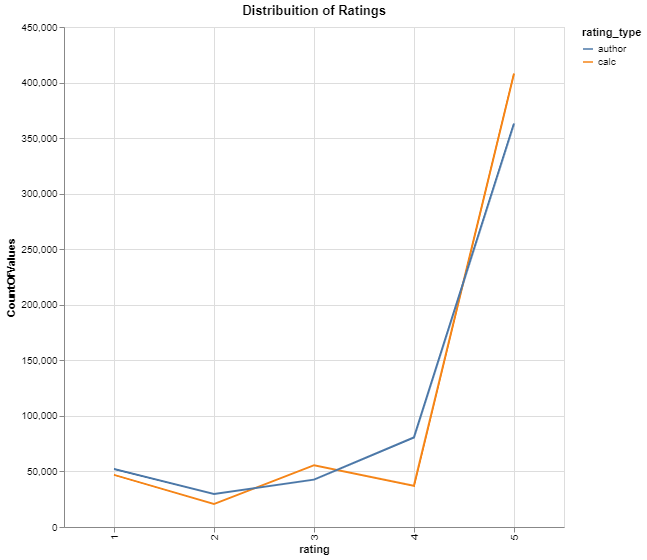

In [19]:
%chart x=rating, y=CountOfValues, groupingcol=rating_type, mark=line, title=Distribuition of Ratings, height=500, width=500


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>An observation</p>

<p style = 'font-size:16px;font-family:Arial'>Overlaying the calculated rating on top of the author rating shows an interesting potential conclusion at the most positive of ratings - the calculation <b>over</b>estimates ratings of five, but <b>under</b>estimates ratings of four.  Could this be due to natural resistance to rating things the 'best' even though they use very positive language?</p>

<p style = 'font-size:16px;font-family:Arial'>Another possible question to ponder on the other side of this; are users more willing to give a lower rating value, but moderate their language in their review?</p>

In [20]:
--Clean up all the tables we created above, except for the reviews table
DROP TABLE ratings_comparison

Success: 19 rows affected

In [21]:
DROP TABLE SentimentExtractor_output

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3807:Object 'SentimentExtractor_output' does not exist.

In [22]:
DROP TABLE additional_metrics_labels

Success: 0 rows affected

<p style = 'font-size:20px;font-family:Arial;color:#E37C4D'> <b>9. CleanUp </b></p>
<p style = 'font-size:16px;font-family:Arial'>The following code will clean up tables and databases created above.</p>

In [23]:
call remove_data('DEMO_FoodReviews');-- takes about 10 seconds, optional if you want to use the data later

Success: 0 rows affected

Success: 0 rows affected

,Message
1,Removed objects related to DEMO_FoodReviews. That ran for 0:00:04.18


<footer style="padding:10px;background:#f9f9f9;border-bottom:3px solid #394851">©2022 Teradata. All Rights Reserved</footer>